# Tendência das Vendas

## Alucar - Analisando as Vendas

### Analisando a base de dados

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt

In [2]:
dados_alucar = pd.read_csv('alucar.csv')
dados_alucar.head()

,mes,vendas
0,2017-01-31,10
1,2017-02-28,20
2,2017-03-31,33
3,2017-04-30,47
4,2017-05-31,63


In [3]:
dados_alucar.describe()

,vendas
count,24.000000
mean,287.875000
std,222.151204
min,10.000000
25%,96.000000
50%,245.500000
75%,450.750000
max,721.000000


In [4]:
dados_alucar.shape

(24, 2)

In [5]:
dados_alucar.isna().sum()

mes       0
vendas    0
dtype: int64

In [6]:
dados_alucar.dtypes

mes       object
vendas     int64
dtype: object

**Convertendo o campo "mes" do tipo object do Pandas para o tipo DATETIME**

In [7]:
dados_alucar['mes'] = pd.to_datetime(dados_alucar['mes'])
dados_alucar.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

In [8]:
dados_alucar

,mes,vendas
0,2017-01-31,10
1,2017-02-28,20
2,2017-03-31,33
3,2017-04-30,47
4,2017-05-31,63
5,2017-06-30,81
6,2017-07-31,101
7,2017-08-31,124
8,2017-09-30,148
9,2017-10-31,174


### Analise Visual

<Axes: xlabel='mes', ylabel='vendas'>

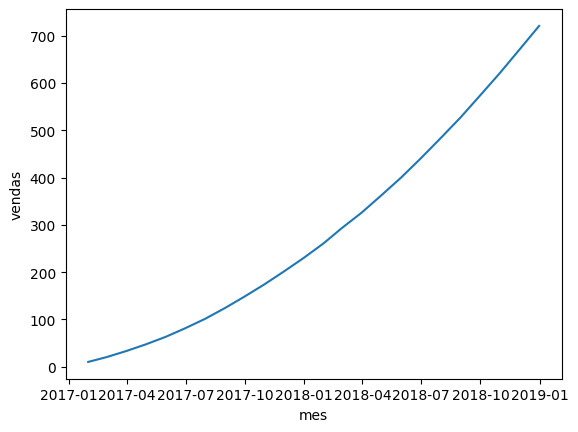

In [17]:
sns.lineplot(
    x= 'mes',
    y= 'vendas',
    data= dados_alucar
)

**Setando o Seaborn**

<Axes: title={'left': 'Vendas Alucar 2017 - 2018'}, xlabel='Meses', ylabel='Vendas (R$)'>

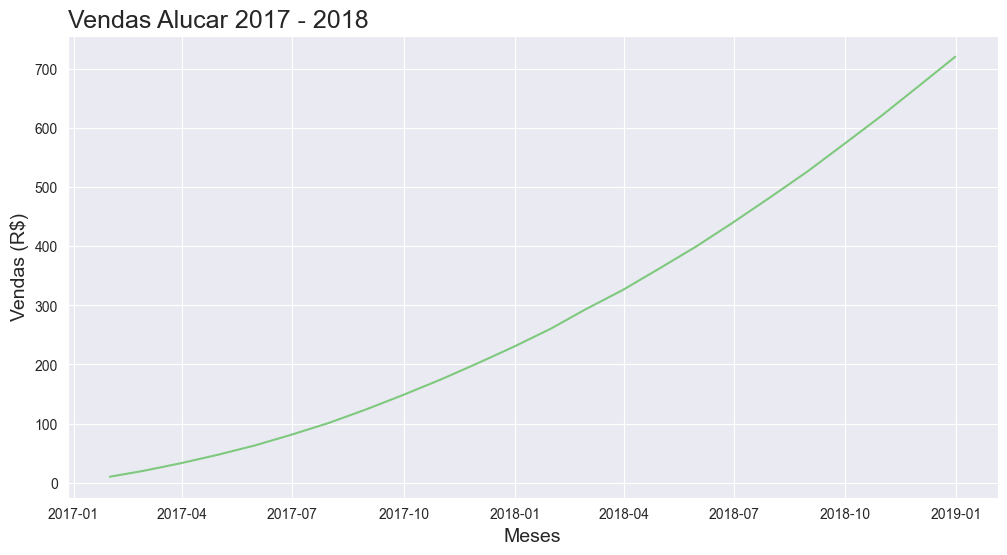

In [32]:
ax = sns.lineplot(
    x= 'mes',
    y= 'vendas',
    data= dados_alucar
)

sns.set_palette('Accent')
sns.set_style('darkgrid')

ax.figure.set_size_inches(12,6)
ax.set_title('Vendas Alucar 2017 - 2018', loc= 'left', fontsize= 18)
ax.set_xlabel('Meses', fontsize= 14)
ax.set_ylabel('Vendas (R$)', fontsize= 14)



ax

# Decomposição e autocorrelação

## Decompondo as vendas

In [35]:
dados_alucar.head()

,mes,vendas
0,2017-01-31,10
1,2017-02-28,20
2,2017-03-31,33
3,2017-04-30,47
4,2017-05-31,63


In [36]:
dados_alucar['aumento'] = dados_alucar['vendas'].diff()
dados_alucar

,mes,vendas,aumento
0,2017-01-31,10,NaN
1,2017-02-28,20,10.0
2,2017-03-31,33,13.0
3,2017-04-30,47,14.0
4,2017-05-31,63,16.0
5,2017-06-30,81,18.0
6,2017-07-31,101,20.0
7,2017-08-31,124,23.0
8,2017-09-30,148,24.0
9,2017-10-31,174,26.0


<Axes: title={'left': 'Aumento das Vendas Alucar 2017 - 2018'}, xlabel='Meses', ylabel='Aumento (R$)'>

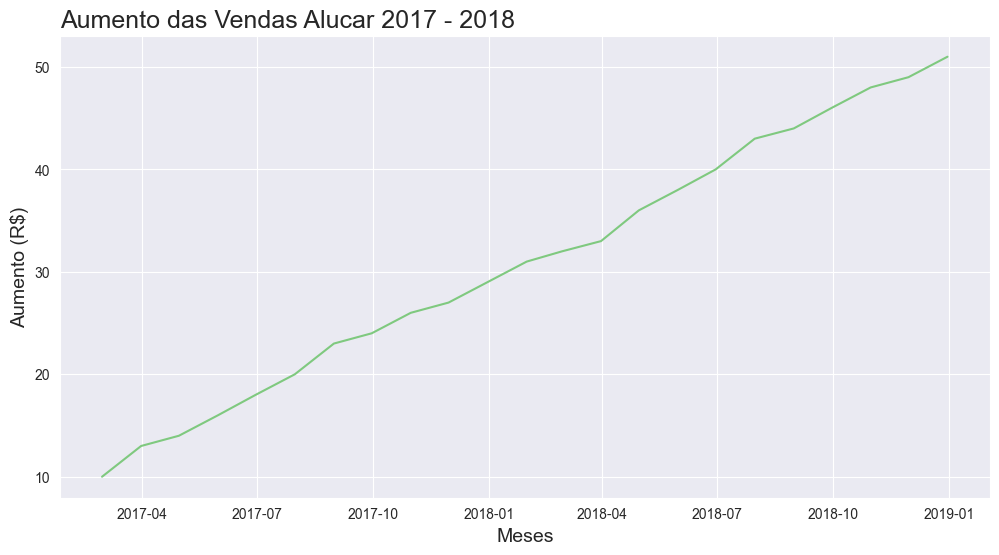

In [39]:
ay = sns.lineplot(
    x= 'mes',
    y= 'aumento',
    data= dados_alucar
)

sns.set_palette('Accent')
sns.set_style('darkgrid')

ay.figure.set_size_inches(12,6)
ay.set_title('Aumento das Vendas Alucar 2017 - 2018', loc= 'left', fontsize= 18)
ay.set_xlabel('Meses', fontsize= 14)
ay.set_ylabel('Aumento (R$)', fontsize= 14)



ay

**Criando função para facilitar a plotagem**

In [47]:
def plotar(x, y, dataset, titulo, labelx, labely):
    grafico = sns.lineplot(
    x= x,
    y= y,
    data= dataset
    )

    sns.set_palette('Accent')
    sns.set_style('darkgrid')

    grafico.figure.set_size_inches(12,6)
    grafico.set_title(titulo, loc= 'left', fontsize= 18)
    grafico.set_xlabel(labelx, fontsize= 14)
    grafico.set_ylabel(labely, fontsize= 14)

    grafico

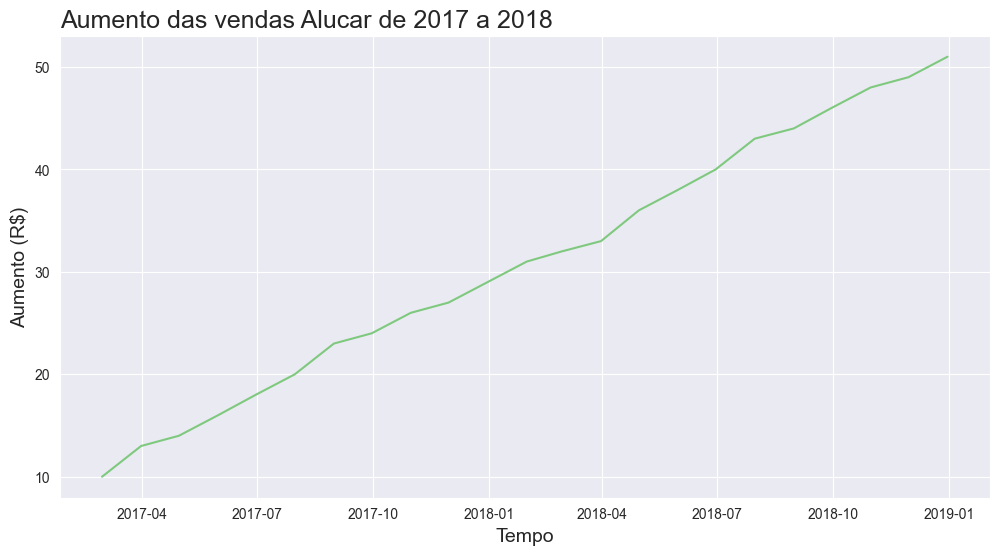

In [48]:
plotar(x='mes',
       y='aumento',
       dataset=dados_alucar,
        titulo='Aumento das vendas Alucar de 2017 a 2018',
        labelx='Tempo',
        labely='Aumento (R$)')

In [49]:
dados_alucar['aceleracao'] = dados_alucar['aumento'].diff()
dados_alucar

,mes,vendas,aumento,aceleracao
0,2017-01-31,10,NaN,NaN
1,2017-02-28,20,10.0,NaN
2,2017-03-31,33,13.0,3.0
3,2017-04-30,47,14.0,1.0
4,2017-05-31,63,16.0,2.0
5,2017-06-30,81,18.0,2.0
6,2017-07-31,101,20.0,2.0
7,2017-08-31,124,23.0,3.0
8,2017-09-30,148,24.0,1.0
9,2017-10-31,174,26.0,2.0


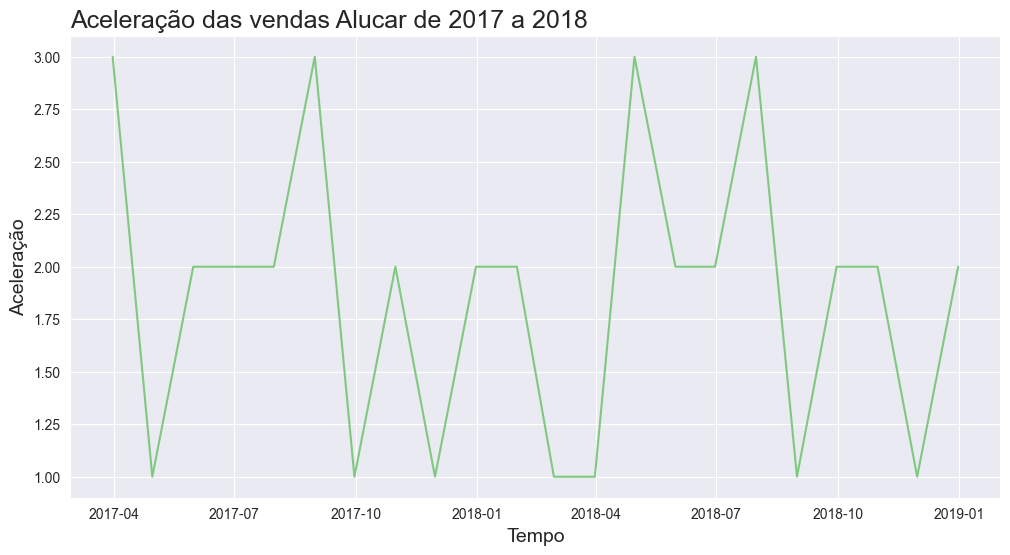

In [51]:
plotar(x='mes',
       y='aceleracao',
       dataset=dados_alucar,
        titulo='Aceleração das vendas Alucar de 2017 a 2018',
        labelx='Tempo',
        labely='Aceleração')

## Observação e tendência

**Juntando gráficos - Criando área de plot**

<Axes: xlabel='mes', ylabel='aceleracao'>

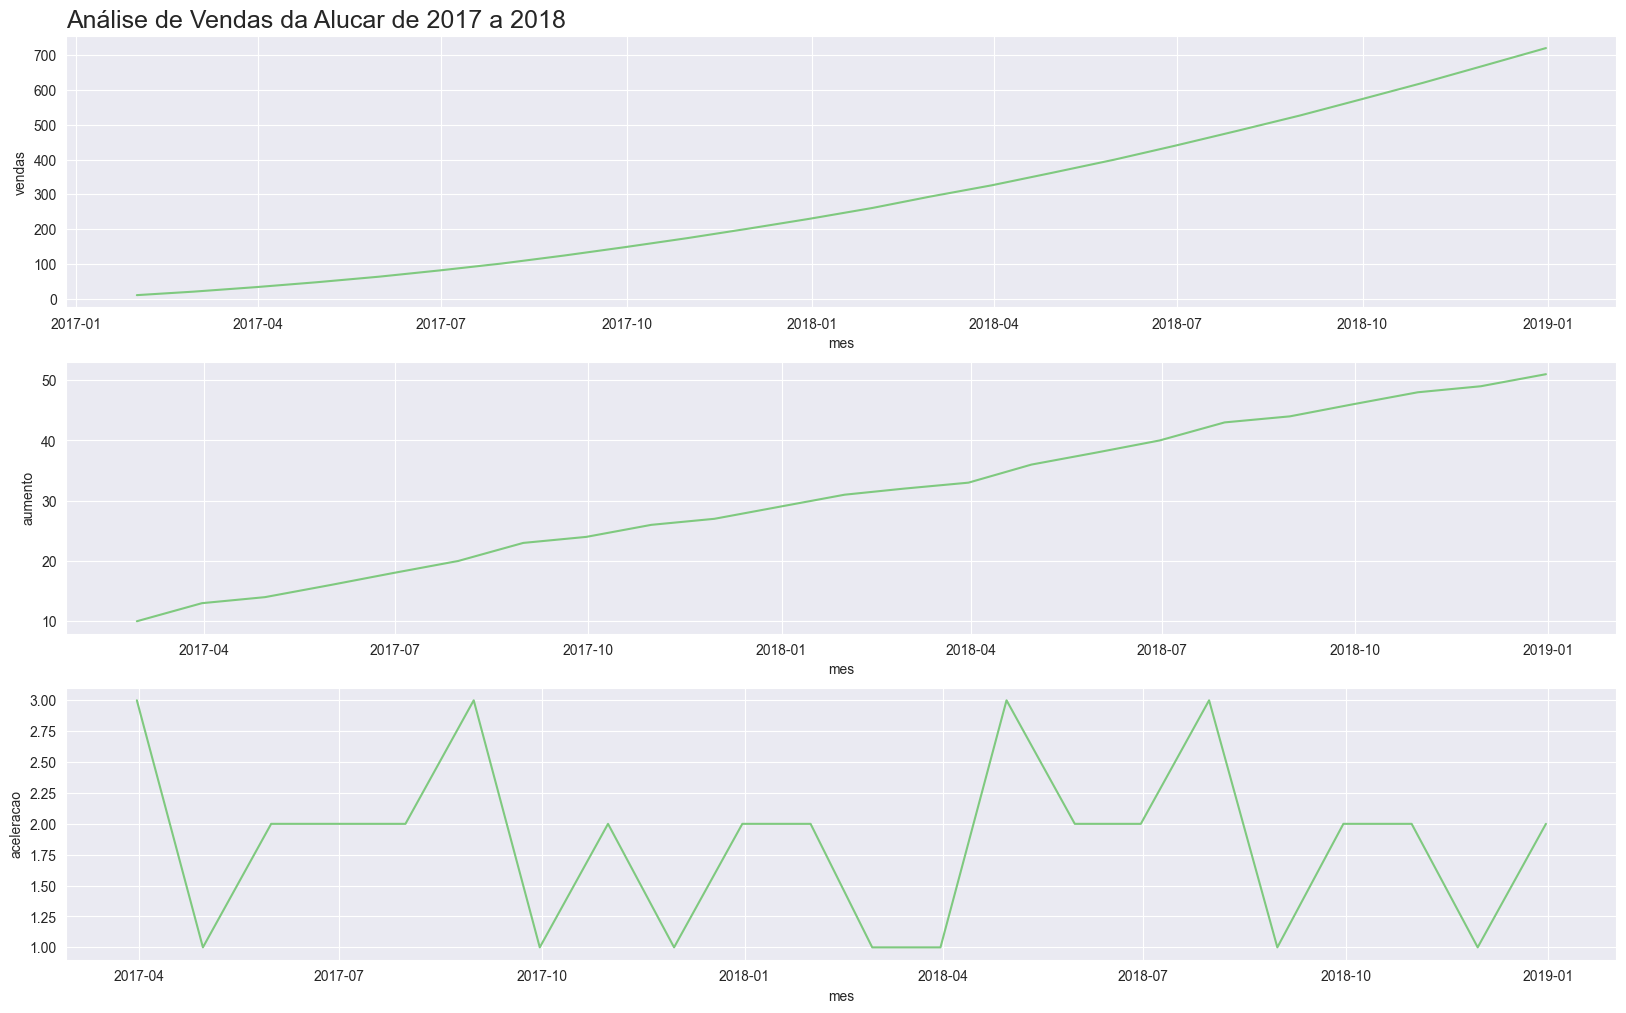

In [86]:
plt.figure(figsize= (20,12))
ax = plt.subplot(3, 1, 1)
ax.set_title('Análise de Vendas da Alucar de 2017 a 2018', fontsize=18, loc='left')
sns.lineplot(
    x= 'mes',
    y= 'vendas',
    data= dados_alucar
)
plt.subplot(3, 1, 2)
sns.lineplot(
    x= 'mes',
    y= 'aumento',
    data= dados_alucar
)
plt.subplot(3, 1, 3)
sns.lineplot(
    x= 'mes',
    y= 'aceleracao',
    data= dados_alucar
)

In [87]:
def plot_comparacao(x, y1, y2, y3, dataset, title, xlabel, ylabel1, ylabel2, ylabel3):
    plt.figure(figsize= (16,16))
    
    
    ax = plt.subplot(3, 1, 1)
    ax.set_title(title, fontsize=18, loc='left')
    ax = sns.lineplot(
        x= x,
        y= y1,
        data= dataset
    )
    ax.set_xlabel(xlabel, fontsize= 14)
    ax.set_ylabel(ylabel1, fontsize= 14)

    ay = plt.subplot(3, 1, 2)
    ay = sns.lineplot(
        x= x,
        y= y2,
        data= dataset
    )
    ay.set_xlabel(xlabel, fontsize= 14)
    ay.set_ylabel(ylabel2, fontsize= 14)

    az = plt.subplot(3, 1, 3)
    az = sns.lineplot(
        x= x,
        y= y3,
        data= dataset
    )
    az.set_xlabel(xlabel, fontsize= 14)
    az.set_ylabel(ylabel3, fontsize= 14)

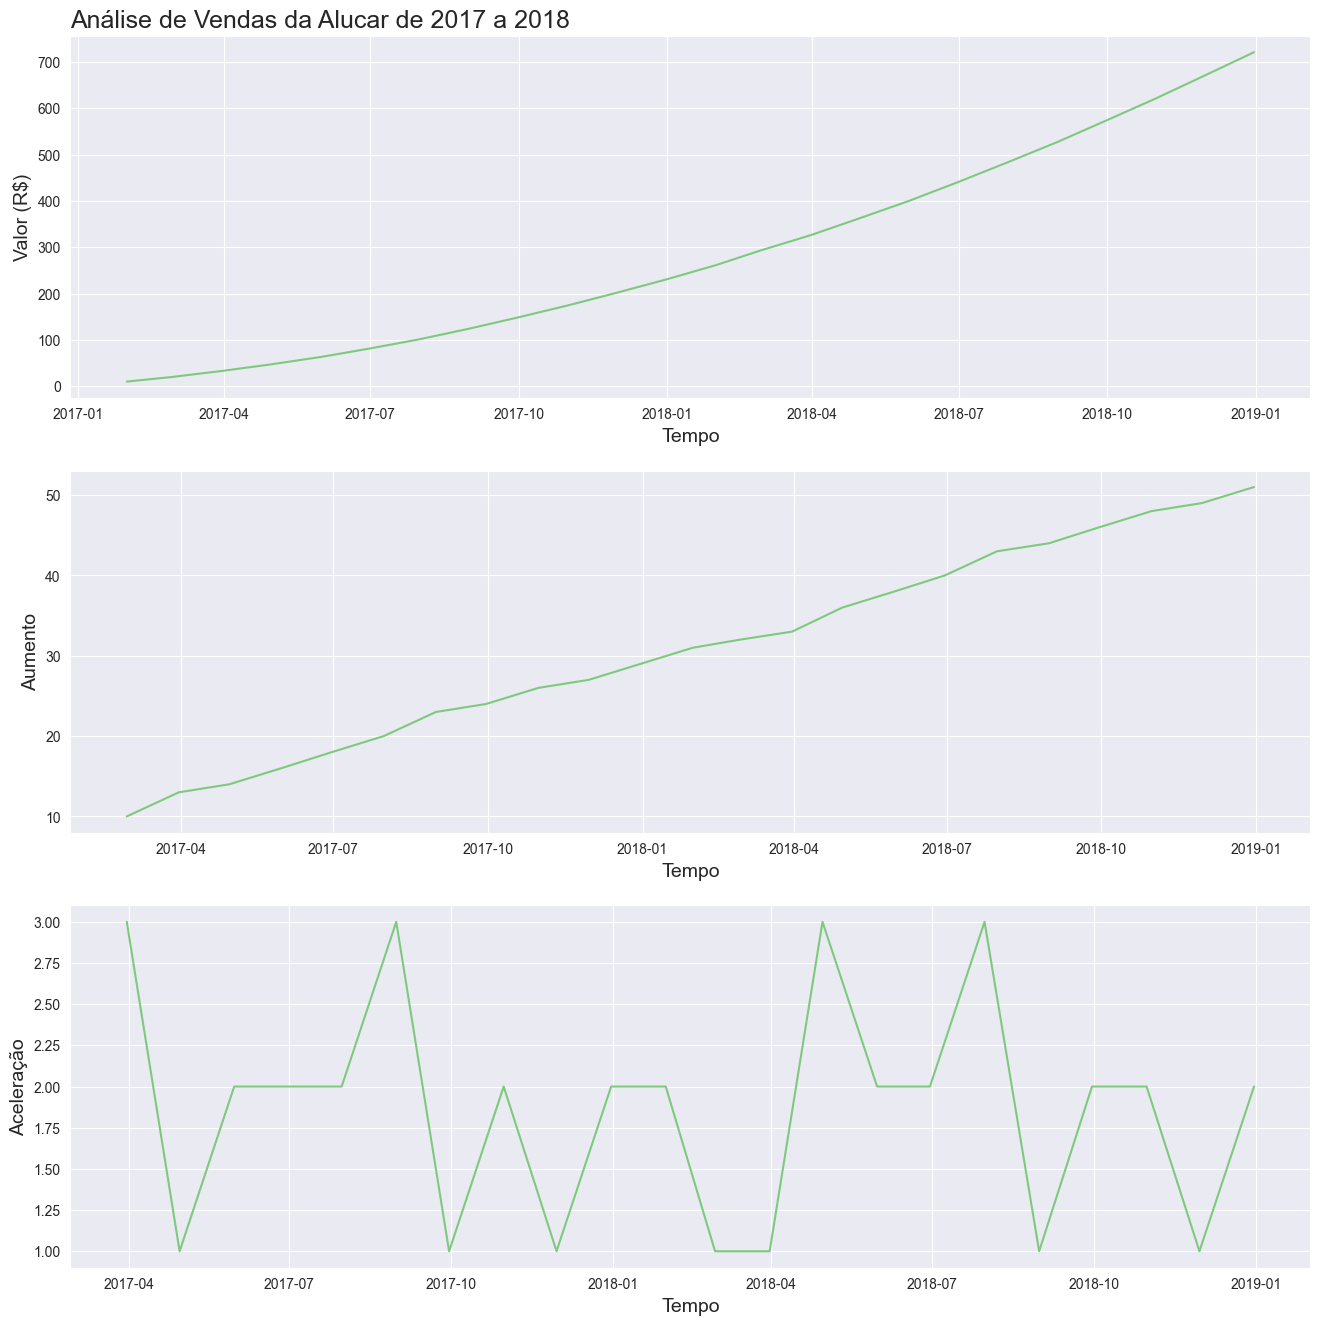

In [88]:
plot_comparacao(x='mes',
                y1='vendas',
                y2='aumento',
                y3='aceleracao',
                dataset=dados_alucar,
                title='Análise de Vendas da Alucar de 2017 a 2018',
                xlabel='Tempo',
                ylabel1='Valor (R$)',
                ylabel2='Aumento',
                ylabel3='Aceleração')

## Autocorrelação